In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle = True,
                                                    image_size = (256, 256),
                                                    batch_size = 32)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset) #68 as there is batch each with 32 images

68

In [7]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 50

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) #prints a tensor

tf.Tensor(
[[[188. 183. 189.]
  [198. 193. 199.]
  [199. 194. 200.]
  ...
  [192. 189. 196.]
  [192. 189. 196.]
  [186. 183. 190.]]

 [[190. 185. 191.]
  [201. 196. 202.]
  [202. 197. 203.]
  ...
  [189. 186. 193.]
  [188. 185. 192.]
  [185. 182. 189.]]

 [[186. 181. 187.]
  [196. 191. 197.]
  [196. 191. 197.]
  ...
  [186. 183. 190.]
  [184. 181. 188.]
  [186. 183. 190.]]

 ...

 [[152. 145. 152.]
  [152. 145. 152.]
  [157. 150. 157.]
  ...
  [133. 128. 135.]
  [141. 136. 143.]
  [150. 145. 152.]]

 [[148. 141. 148.]
  [148. 141. 148.]
  [154. 147. 154.]
  ...
  [134. 129. 136.]
  [141. 136. 143.]
  [151. 146. 153.]]

 [[153. 146. 153.]
  [153. 146. 153.]
  [158. 151. 158.]
  ...
  [136. 131. 138.]
  [140. 135. 142.]
  [146. 141. 148.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()) #convert tensor object to numpy

[[[ 99. 101. 113.]
  [106. 108. 120.]
  [112. 114. 126.]
  ...
  [130. 132. 145.]
  [133. 135. 148.]
  [135. 137. 150.]]

 [[122. 124. 136.]
  [120. 122. 134.]
  [125. 127. 139.]
  ...
  [139. 141. 154.]
  [140. 142. 155.]
  [141. 143. 156.]]

 [[109. 111. 123.]
  [104. 106. 118.]
  [117. 119. 131.]
  ...
  [142. 144. 157.]
  [141. 143. 156.]
  [140. 142. 155.]]

 ...

 [[105. 108. 125.]
  [109. 112. 129.]
  [113. 116. 133.]
  ...
  [115. 118. 137.]
  [112. 115. 134.]
  [113. 116. 135.]]

 [[ 86.  89. 106.]
  [ 95.  98. 115.]
  [106. 109. 126.]
  ...
  [129. 132. 151.]
  [128. 131. 150.]
  [132. 135. 154.]]

 [[ 96.  99. 116.]
  [ 98. 101. 118.]
  [101. 104. 121.]
  ...
  [121. 124. 143.]
  [123. 126. 145.]
  [129. 132. 151.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


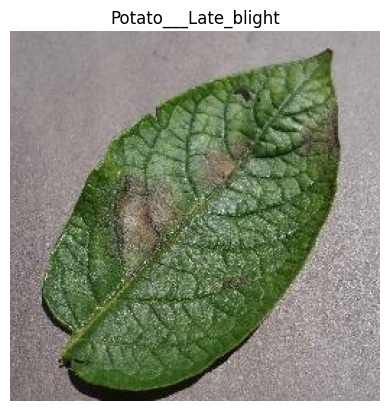

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis('off')
    plt.title(class_names[label_batch[0]])

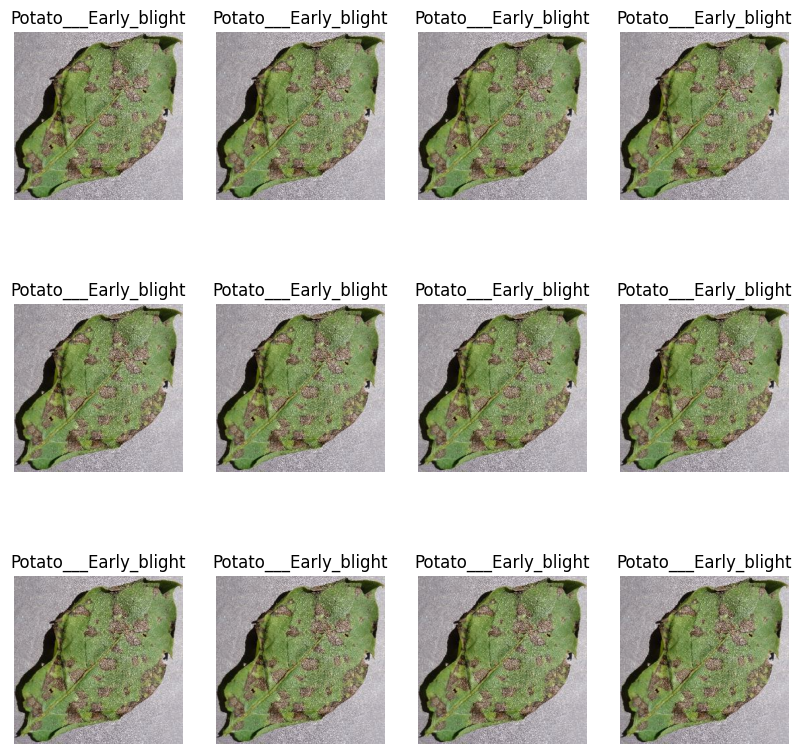

In [12]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[label_batch[0]])

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_Size = 0.1 #for validation dataset

In [17]:
val_ds = dataset.take(6)
len(val_ds)

6

In [18]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 123)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [20]:
len(train_ds)

54

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size, Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [24]:
input_shape = (Batch_size, Image_size, Image_size, Channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])

In [27]:
history = model.fit(train_ds, epochs = Epochs, batch_size = Batch_size, verbose = 1, validation_data = val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.5280 - loss: 0.8883 - val_accuracy: 0.7344 - val_loss: 0.7665
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.7939 - loss: 0.4888 - val_accuracy: 0.9010 - val_loss: 0.2303
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 266ms/step - accuracy: 0.8753 - loss: 0.2893 - val_accuracy: 0.9167 - val_loss: 0.2434
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.9167 - loss: 0.2287 - val_accuracy: 0.8906 - val_loss: 0.2557
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step - accuracy: 0.9354 - loss: 0.1751 - val_accuracy: 0.9375 - val_loss: 0.1640
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 269ms/step - accuracy: 0.9618 - loss: 0.0988 - val_accuracy: 0.9583 - val_loss: 0.1469
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - accuracy: 0.9596 - loss: 0.1140 - val_accuracy: 0.9010 - val_loss: 0.2058
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 266ms/step - accuracy: 0.9661 - loss: 0.1029 - val_accu

In [28]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9424 - loss: 0.1888


In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.history['accuracy']

[0.6643192768096924,
 0.8350939154624939,
 0.8920187950134277,
 0.92136150598526,
 0.9383803009986877,
 0.9512910842895508,
 0.9507042169570923,
 0.9507042169570923,
 0.9289906024932861,
 0.9477699398994446,
 0.95363849401474,
 0.9647887349128723,
 0.9336854219436646,
 0.9600939154624939,
 0.9683098793029785,
 0.9600939154624939,
 0.9553990364074707,
 0.9653756022453308,
 0.9512910842895508,
 0.9659624695777893,
 0.9683098793029785,
 0.9694835543632507,
 0.9624413251876831,
 0.9700704216957092,
 0.9612675905227661,
 0.96772301197052,
 0.9589201807975769,
 0.9741784334182739,
 0.9735915660858154,
 0.9788732528686523,
 0.9788732528686523,
 0.9747652411460876,
 0.9747652411460876,
 0.9788732528686523,
 0.9659624695777893,
 0.9794601202011108,
 0.9753521084785461,
 0.9818075299263,
 0.9688966870307922,
 0.9753521084785461,
 0.9694835543632507,
 0.9847418069839478,
 0.9653756022453308,
 0.9765258431434631,
 0.9612675905227661,
 0.9759389758110046,
 0.9888497591018677,
 0.9865023493766785,
 

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

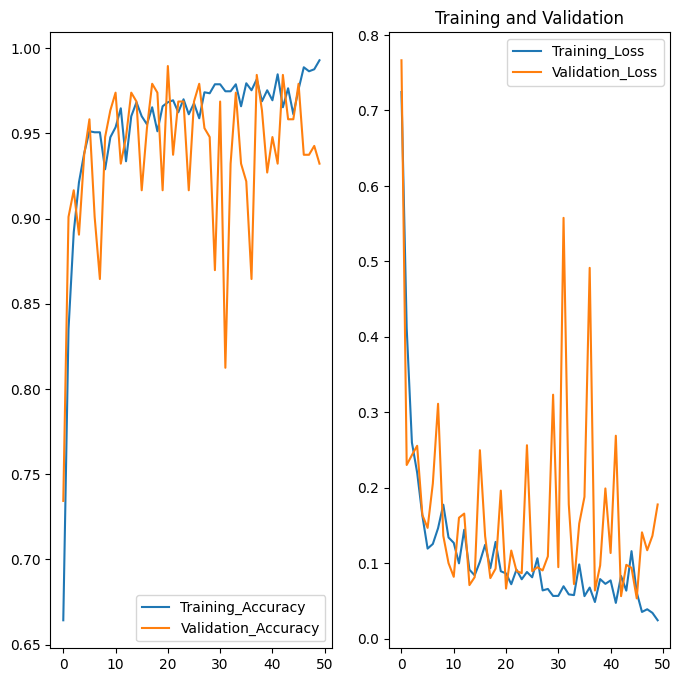

In [34]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label = 'Training_Accuracy')
plt.plot(range(Epochs), val_acc, label = 'Validation_Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label = 'Training_Loss')
plt.plot(range(Epochs), val_loss, label = 'Validation_Loss')
plt.legend(loc = 'upper right')

plt.title('Training and Validation')
plt.show()

In [35]:
import numpy as np

Label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
0
Potato___Early_blight


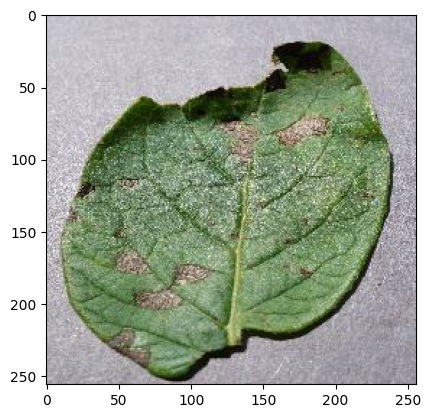

In [36]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    plt.imshow(first_image)
    print("Label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print(np.argmax(batch_prediction[0])) #Numpy max value (index) of the predicted output
    print(class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


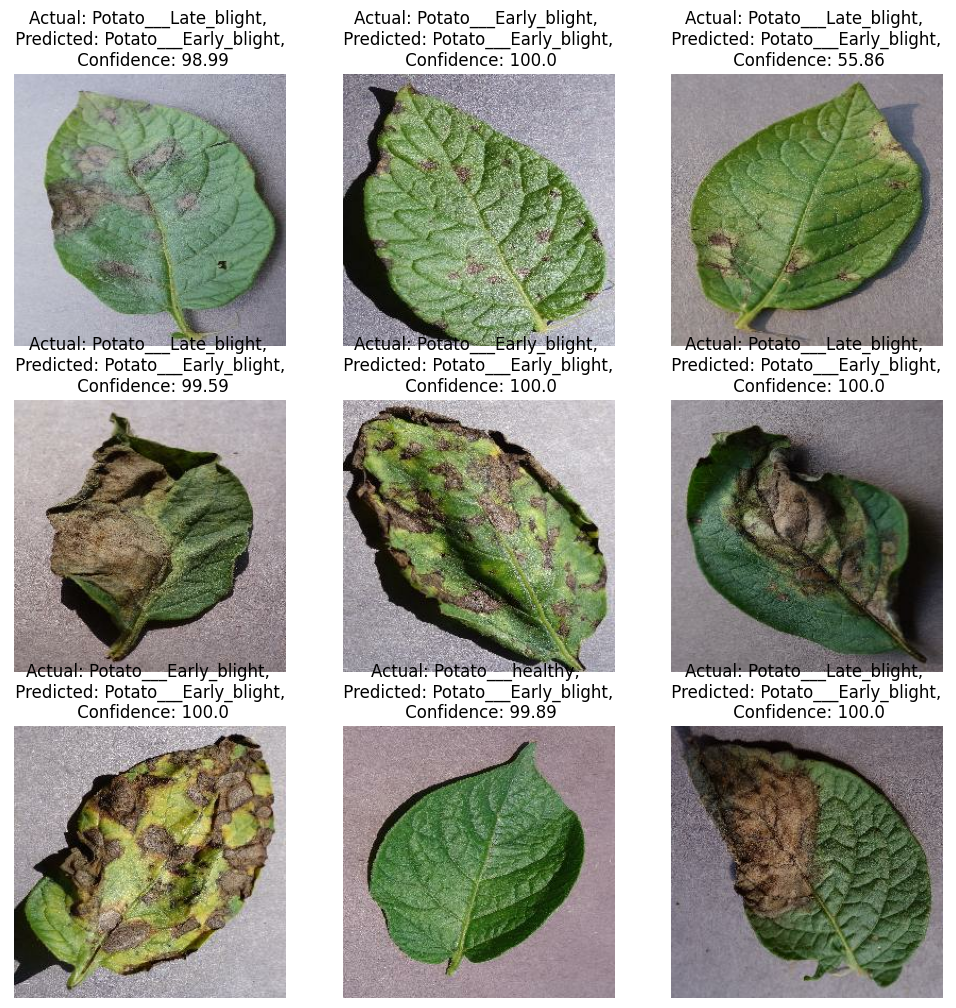

In [38]:
plt.figure(figsize = (12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")

In [39]:
model_version = 2
model.export(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


Saved artifact at '../models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1698240953808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698240954000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446230928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446231888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446232080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446232848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446232464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446233232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446232272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446233616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1698446233040: TensorSpec(shape=(), dty

In [45]:
model.save('my_model.keras')